In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
#import file
df = pd.read_csv('cleaned_data.csv')


#choose relavent columns

df.columns
df_model = df[['rank','address','website','url Length']]


In [110]:
#get dummy data
df_dum = pd.get_dummies(df_model)
df

#train test split
from sklearn.model_selection import train_test_split

x = df_dum.drop('rank', axis = 1)
y = df_dum['rank'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 42)

#multiple linear regression
import statsmodels.api as sm
x_sm = x = sm.add_constant(x)
model = sm.OLS(y,x_sm)
model.fit().summary()

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(x_train, y_train)

np.mean(cross_val_score(lm,x_train,y_train,scoring = 'neg_mean_absolute_error',cv=3))

-54757817029428.0

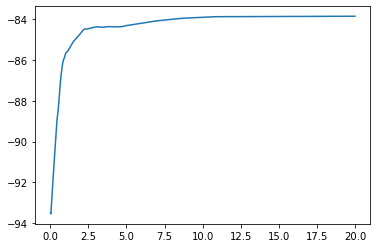

,alpha,error
998,19.98,-83.850528


In [111]:
#lasso regression
lm_l = Lasso(alpha=19.98)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train,y_train,scoring = 'neg_mean_absolute_error', cv=3))

alpha = []
error=[]

for i in range(1,1000):
    alpha.append(i/50)
    lml = Lasso(alpha=(i/50))
    error.append(np.mean(cross_val_score(lml,x_train,y_train,
    scoring = 'neg_mean_absolute_error', cv=3)))

plt.plot(alpha,error)
plt.show()
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [104]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,x_train,y_train,scoring = 'neg_mean_absolute_error', cv=3))

-88.7631294637115

In [105]:
#tune models Gridsearchcsv
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10),'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring = 'neg_mean_absolute_error', cv=3)
gs.fit(x_train,y_train)



RandomForestRegressor(max_features='sqrt', n_estimators=50)

In [109]:
gs.best_score_

-81.91750782421444

In [108]:
gs.best_estimator_


RandomForestRegressor(max_features='sqrt', n_estimators=50)

In [114]:
#test ensemble
tpred_lm = lm.predict(x_test)
tpred_lml = lm_l.predict(x_test)
tpred_rf = gs.best_estimator_.predict(x_test)

In [117]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,tpred_lm)

3846548348600.808

In [118]:
mean_absolute_error(y_test,tpred_lml)

83.88391503992487

In [119]:
mean_absolute_error(y_test,tpred_rf)

72.8018074777627